# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## Откройте файл с данными и изучите общую информацию.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv',  sep='\t')
data.info() #выводим общую информацию
data.head() #выводим первые пять строк таблицы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


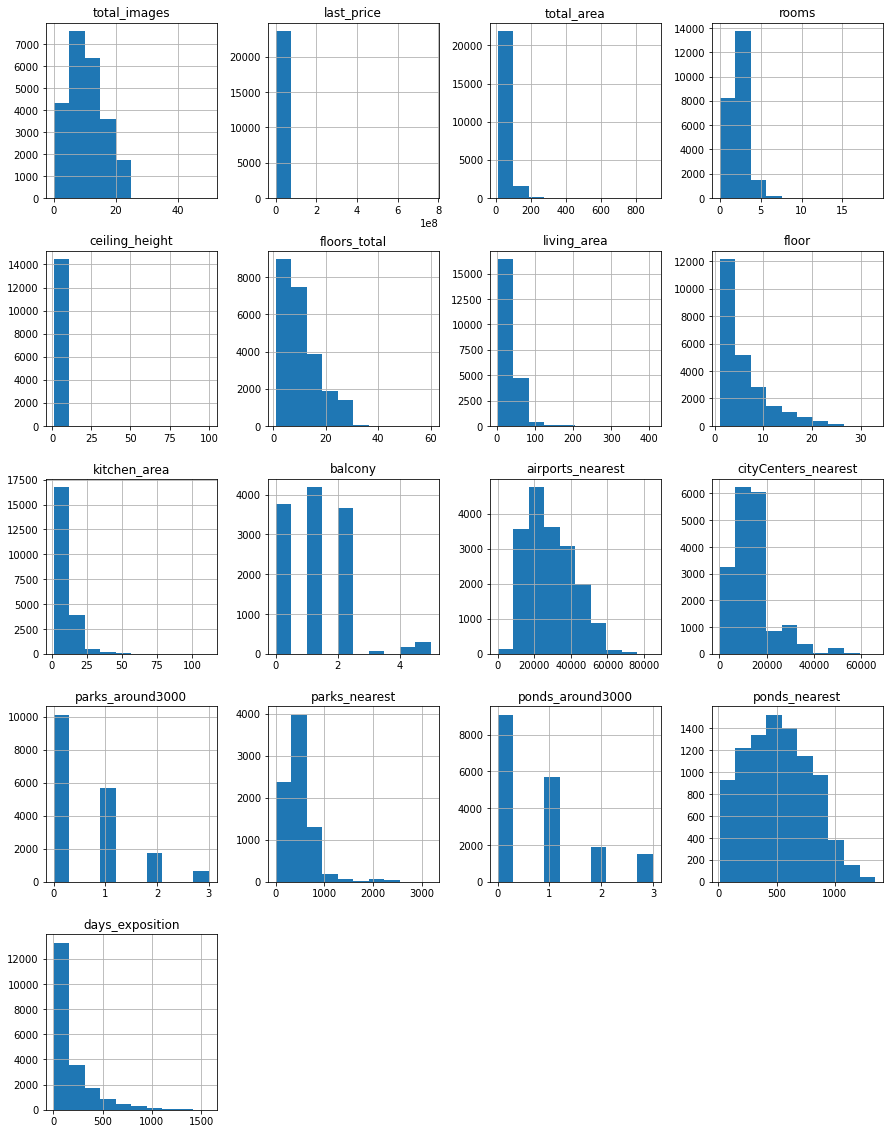

In [ ]:
data.hist(figsize=(15, 20))
plt.show()

## Предобработка данных

In [ ]:
data.isna().sum() # определяем количество пропусков в каждом столбце

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Высота потолка ceiling_height
 > В 9195 строках не указана высота потолка. Можно предположить, что это квартиры с так называемым "стандартным" потолком, т.к если бы потолки были высокими, то, скорее всего, это было бы указано. Соответственно, заменим отстуствующие значения на среднюю высоту потолка. Воспользуемся медианой, чтобы не включать в среднее значение экстримальные показатели.

In [ ]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Видим очевидные аномальные значения минимума 1 м. и максимума 100 м.

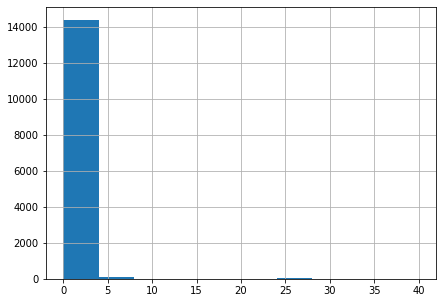

In [ ]:
data['ceiling_height'].hist(bins = 10, figsize = (7,5), range = (0,40));

Видим, что большая часть потолков 2-4,5 м.
Есть значения в районе 25ти. Скорее всего это неверно записанные данные. Проверим

In [ ]:
data.query('ceiling_height>20')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,...,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,NaN,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.0,5.0,31.3,5,NaN,...,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,NaN,...,5.2,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


Действительно похоже, что кроме 100, в значениях просто потеряна запятая. Исправим

In [ ]:
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] /= 10

In [ ]:
data.query('ceiling_height>20')#проверим

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [ ]:
data.query('ceiling_height >= 6 or ceiling_height <= 2 ').count()

total_images            23
last_price              23
total_area              23
first_day_exposition    23
rooms                   23
ceiling_height          23
floors_total            23
living_area             21
floor                   23
is_apartment             3
studio                  23
open_plan               23
kitchen_area            19
balcony                  9
locality_name           23
airports_nearest        13
cityCenters_nearest     13
parks_around3000        13
parks_nearest            8
ponds_around3000        13
ponds_nearest            8
days_exposition         19
dtype: int64

23 строки со значением потолка выше 6 метров и ниже 2 м. Это меньше одного процента. Удалим их. Пропуски оставим

In [ ]:
data = data.loc[(data['ceiling_height'] <= 6)&(data['ceiling_height'] >= 2)|(data['ceiling_height']).isna()]


#### Количество этажей в доме floors_total               
 > Скорее всего значения в этих строках отсутствуют потому, что эти дома одноэтажные. Поэтому заменим значения ячеек на 1. В любом случае, эти строки не должны сильно повлиять на результат исследования, т.к их количество незначительно (86 строк)

In [ ]:
data['floors_total'] = data['floors_total'].fillna(1)#заменяем значения NAN на 1 в столбце количества этажей в доме
data['floors_total'] = data['floors_total'].astype(int)#поменяем тип данных на целочисленный

#### Жилая площадь living_area
> Выбирая квартиру, покупатели чаще ориентируются на общую площадь квартиры, а не на жилую площадь. Поэтому пока оставим ячейки как есть.

In [ ]:
data[['living_area']].apply (['count', 'min', 'max']).style.format("{:,.2f}")


,living_area
count,"21,785.00"
min,2.00
max,409.70


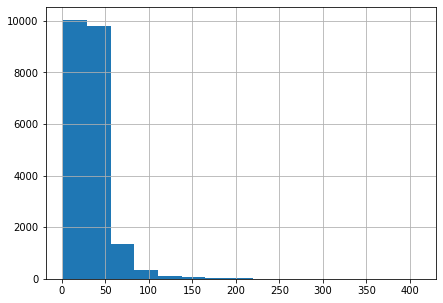

In [ ]:
data['living_area'].hist(bins = 15, figsize = (7,5));

Количество квартир с жилой площадью больше 130 кв.м. резко снижается. Посчитаем сколько их

In [ ]:
data.query('living_area > 130').count()


total_images            176
last_price              176
total_area              176
first_day_exposition    176
rooms                   176
ceiling_height          118
floors_total            176
living_area             176
floor                   176
is_apartment             15
studio                  176
open_plan               176
kitchen_area            164
balcony                  86
locality_name           176
airports_nearest        171
cityCenters_nearest     174
parks_around3000        174
parks_nearest           124
ponds_around3000        174
ponds_nearest           128
days_exposition         137
dtype: int64

176 строк это меньше 1%, можно удалить эти строки,как редкие.

In [ ]:
data = data.loc[(data['living_area'] < 130)|(data['living_area'].isna())]

#### Количество балконов balcony
> Отсутствующие значения количества балконов заменим на 0, т.к. скорее всего они не указаны по причине отсутствия балкона в квартире.

In [ ]:
data['balcony'] = data['balcony'].fillna(0) #заменяем значения NAN на 0 в столбце количества балконов
data['balcony'] = data['balcony'].astype(int) #заменим тип данных на целочисленный.

#### Площадь kitchen_area
> Пока не хватает данных, чтобы сделать замену отсутстсвующих значений по площади кухни. Ни среднее арифметическое, ни медиана не подходят, т.к все квартиры отличаются площадью и брать средеее просто некорректно. Можем предположить, что площадь кухни не указана в апартаментах и студиях, т.к она объединина с жилой и общей площадью.

Проверим это предположение, построив графики зависимости отсутствия значения о площади кухни в апартаментах и студиях

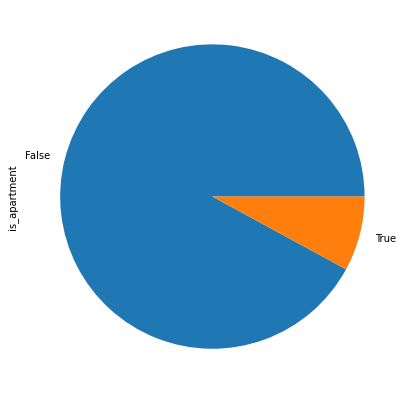

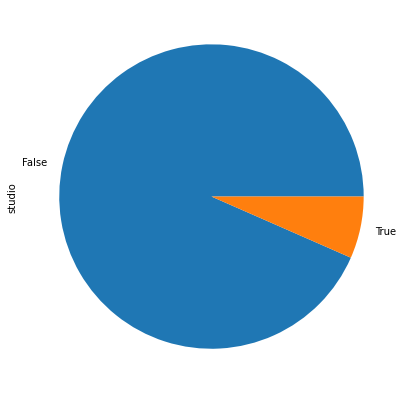

In [ ]:
no_kitch_sq = data[data['kitchen_area'].isnull()] #вводим переменную со значением NaN в столбце площадь кухни
#строим график, проверяем в скольких апартаментах не указана площадь кухни
no_kitch_sq['is_apartment'].value_counts().plot(kind='pie', figsize = (7,7))
plt.show() #убираем служебную информацию
#строим график, проверяем в скольких студиях не указана площадь кухни
no_kitch_sq['studio'].value_counts().plot(kind='pie', figsize = (7,7))
plt.show()

In [ ]:
data[['kitchen_area']].apply (['count', 'min', 'max']).style.format("{:,.2f}")

,kitchen_area
count,"21,244.00"
min,1.30
max,107.00


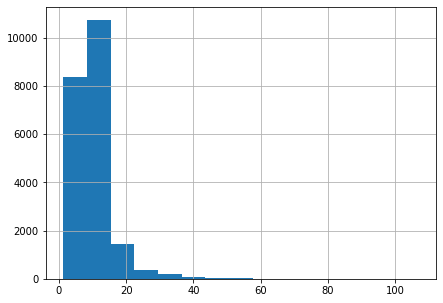

In [ ]:
data['kitchen_area'].hist(bins = 15, figsize = (7,5));

Значения больше 50 довольно редки, посчитаем их

In [ ]:
data.query('kitchen_area > 50').count()


total_images            35
last_price              35
total_area              35
first_day_exposition    35
rooms                   35
ceiling_height          25
floors_total            35
living_area             33
floor                   35
is_apartment             5
studio                  35
open_plan               35
kitchen_area            35
balcony                 35
locality_name           35
airports_nearest        34
cityCenters_nearest     34
parks_around3000        34
parks_nearest           24
ponds_around3000        34
ponds_nearest           20
days_exposition         28
dtype: int64

35 строк. Можем удалить, как редко встречающиеся

In [ ]:
data = data.loc[(data['kitchen_area'] < 50)|(data['kitchen_area'].isna())]

По графикам видно, что отсутствие данных о площади кухни никак не зависит от того квартира это, апартаменты или студия.  Оставим значения ячеек как есть.

#### Город locality_name
> 49 строк с пропущенными значениями местоположения квартир удалим из датафрейма. Т.к расположение является одним из главных критереев выбора жилья, строки где этих значений нет, не имеют смысла.

In [ ]:
data.loc[data['locality_name'].isna() == True] #посмотрим на данные без указания населенного пункта

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5,50.80,2,NaN,...,8.80,0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.00,2017-05-30T00:00:00,3,NaN,4,42.60,2,NaN,...,18.60,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.70,2015-09-20T00:00:00,1,NaN,24,15.60,3,NaN,...,10.70,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.40,2015-10-11T00:00:00,2,NaN,24,33.10,21,NaN,...,8.20,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,NaN,5,30.80,5,NaN,...,6.50,0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8,39.62,7,NaN,...,13.38,0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4,52.30,3,False,...,10.40,0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,NaN,7,NaN,6,NaN,...,NaN,0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,NaN,7,59.10,5,False,...,8.30,4,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.00,2016-04-29T00:00:00,1,NaN,24,20.00,23,NaN,...,NaN,0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


In [ ]:
data = data.dropna(subset = ['locality_name']) #ничего выделяющегося на первый взгляд в этих строках нет, удалим их

#### Расстояние до аэропорта airports_nearest, расстояние до ценнтра cityCenters_nearest
>  Отсутствующие значения расстояния до аэропорта и до центра города имеет смысл заменить на медианные значения, сгруппировав по населенному пункту

In [ ]:
#for row in data['locality_name'].unique():
 #   data.loc[(data['locality_name'] == row) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
  #  data.loc[(data['locality_name'] == row), 'airports_nearest'].median()

При проверке, получаем предупреждение от Python, что заставляет задуматься, а есть ли аэропорт в тех локациях, где ячейки со значением NaN. Т.к. оценить наверняка очень сложно, будем отталкиваться от того, что аэропорт находится в Санкт-Петербурге. Проверим, есть ли незаполненные ячейки с локацией там.

In [ ]:
data.query('airports_nearest.isna() and airports_nearest == "Санкт-Петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Нет. Таких строк нет. Будем иметь в виду, что если значение не заполнено, значит аэропорт где-то далеко. Значения менять не будем.


#### Апартаменты is_apartment
>Заменим все недостающие знгачения на False

In [ ]:
pd.set_option('mode.chained_assignment', None)
#уберем предупреждение, связанное с особенностью библиотеки, оно не влияет на результат
data['is_apartment'] = data['is_apartment'].fillna(False)

#### Парки поблизости parks_around3000, водоемы поблизости ponds_around3000
>Заменим эти значения на 0, т.к. скорее всего парков и водоемов поблизости просто нет

In [ ]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

#### Расстояние до ближайшего парка parks_nearest, расстояние до ближайшего водоема ponds_nearest
> Замениить отсутствующие значения на 0 мы не можем, т.к. в этом случае получится, что квартира находится в непосредственной близости от парка/водоема. Поэтому эти значения оставим как есть/

#### Количество дней, на которе было размещено объявление days_exposition
> Пропуски в ['days_exposition'] говорят нам, что квартиры еще не проданы. Оставляем.

In [ ]:
data[['days_exposition']].apply (['count', 'min', 'max']).style.format("{:,.2f}")

,days_exposition
count,"20,285.00"
min,1.00
max,"1,580.00"


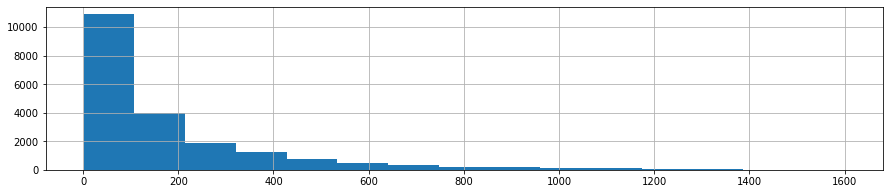

In [ ]:
data.days_exposition.hist(bins = 15, figsize = (15,3), range = (1,1600))
plt.show()

Видим низкое количесвто значений после 1150. Проверим сколько это строк

In [ ]:
data[data['days_exposition'] > 1000].count()

total_images            266
last_price              266
total_area              266
first_day_exposition    266
rooms                   266
ceiling_height          180
floors_total            266
living_area             242
floor                   266
is_apartment            266
studio                  266
open_plan               266
kitchen_area            251
balcony                 266
locality_name           266
airports_nearest        225
cityCenters_nearest     225
parks_around3000        266
parks_nearest           112
ponds_around3000        266
ponds_nearest           145
days_exposition         266
dtype: int64

256 строк - это около 1%, можем удалить

In [ ]:
data = data.loc[(data['days_exposition'] < 1000)|(data['days_exposition'].isna())]

#### Цена

In [ ]:
data['last_price'] = data['last_price'].astype(int)

In [ ]:
data[['last_price']].apply (['count', 'min', 'max']).style.format("{:,.2f}")

,last_price
count,"23,149.00"
min,"12,190.00"
max,"330,000,000.00"


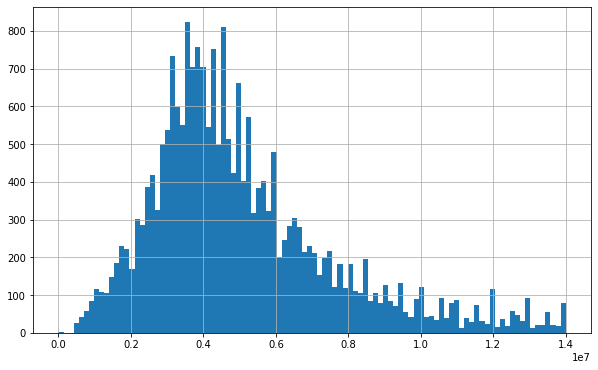

In [ ]:
data.last_price.hist(bins = 100, figsize = (10,6), range = (0, 1.4e+07))
plt.show()

In [ ]:
data['last_price'].describe()

count    2.314900e+04
mean     6.032660e+06
std      6.555309e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.650000e+06
max      3.300000e+08
Name: last_price, dtype: float64

In [ ]:
data[data['last_price'] > 3.0e+07].count() # квартиры стоимостью выше 30 млн

total_images            190
last_price              190
total_area              190
first_day_exposition    190
rooms                   190
ceiling_height          124
floors_total            190
living_area             155
floor                   190
is_apartment            190
studio                  190
open_plan               190
kitchen_area            163
balcony                 190
locality_name           190
airports_nearest        184
cityCenters_nearest     184
parks_around3000        190
parks_nearest           138
ponds_around3000        190
ponds_nearest           148
days_exposition         136
dtype: int64

In [ ]:
data = data.loc[(data['last_price'] < 3.0e+07)|(data['last_price'].isna())]

#### Дата публикации first_day_exposition
> В столбце Дата публикации поменяем тип данных на datetime и проверим

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22952 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22952 non-null  int64         
 1   last_price            22952 non-null  int64         
 2   total_area            22952 non-null  float64       
 3   first_day_exposition  22952 non-null  datetime64[ns]
 4   rooms                 22952 non-null  int64         
 5   ceiling_height        14015 non-null  float64       
 6   floors_total          22952 non-null  int64         
 7   living_area           21115 non-null  float64       
 8   floor                 22952 non-null  int64         
 9   is_apartment          22952 non-null  bool          
 10  studio                22952 non-null  bool          
 11  open_plan             22952 non-null  bool          
 12  kitchen_area          20739 non-null  float64       
 13  balcony         

#### Теперь разберемся с дубликатами.

In [ ]:
duplicated_data  = data[data.duplicated()]
duplicated_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Полных дубликатов нет. Поищем неявные дубликаты

In [ ]:
data['locality_name'].unique()


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
# check
data['locality_name'].nunique()

363

In [ ]:
# Используем метод replace()
data['locality_name'] = data['locality_name'].str.replace('посёлок','поселок')
data['locality_name'] = (
    data['locality_name'].str.replace('поселок Мурино','Мурино')
    .str.replace('деревня Кудрово','Кудрово')
    .str.replace('поселок городского типа Рябово','Рябово')
)

In [ ]:
#проверим
pd.set_option('display.max_columns', None) #строчки, чтобы Юпитер полностью вывел таблицу
pd.set_option('display.max_rows', None)
data['locality_name'].value_counts()

Санкт-Петербург                                            15109
Мурино                                                       584
Кудрово                                                      466
поселок Шушары                                               436
Всеволожск                                                   394
Пушкин                                                       356
Колпино                                                      335
поселок Парголово                                            326
Гатчина                                                      307
Выборг                                                       236
Петергоф                                                     195
Сестрорецк                                                   181
Красное Село                                                 175
деревня Новое Девяткино                                      142
Сертолово                                                    138
Ломоносов                

In [ ]:
data['locality_name'].nunique()

327

Найдем аномальные значения. Выведем таблицу методом describe

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,22952.000000,2.295200e+04,22952.000000,22952.000000,14015.000000,22952.000000,21115.000000,22952.000000,20739.000000,22952.000000,17475.000000,17495.000000,22952.000000,7648.000000,22952.000000,8629.000000,19877.000000
mean,9.844284,5.645989e+06,57.383432,2.019127,2.713378,10.698501,32.770104,5.908635,10.207226,0.594240,28867.331445,14405.275050,0.451551,492.861532,0.570234,524.343956,165.756251
std,5.653254,3.865348e+06,25.779422,0.983738,0.258572,6.634260,16.605272,4.900658,4.810324,0.959013,12755.093537,8555.545043,0.729807,339.884675,0.866064,277.914883,186.225539
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.500000,5.000000,18.500000,2.000000,7.000000,0.000000,18446.000000,9696.000000,0.000000,289.000000,0.000000,303.000000,44.000000
50%,9.000000,4.590000e+06,51.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26895.000000,13237.000000,0.000000,456.000000,0.000000,510.000000,92.000000
75%,14.000000,6.550000e+06,68.000000,3.000000,2.800000,16.000000,41.900000,8.000000,11.700000,1.000000,37412.000000,16408.000000,1.000000,614.000000,1.000000,734.000000,218.000000
max,50.000000,2.999900e+07,441.980000,9.000000,5.800000,60.000000,128.000000,33.000000,49.400000,5.000000,84853.000000,65952.000000,3.000000,3190.000000,3.000000,1344.000000,999.000000


Если посмотреть на минимальные, максимальные значения, становятся очевидными выбросы в столбцах floors_total (максимальное значение 60 этажей, тогда как в Санкт-Петербурге самое высокое здание Лахта-центр имеет 35 этажей ) rooms (минммальное значение 0)

In [ ]:
data = data.loc[(data['rooms'] >= 1)|(data['rooms'].isna())]
                                      #отметаем нулевые значения количества комнат

In [ ]:
data.query('floors_total > 35') #проверим много ли выбросов по этажности

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5990000,54.0,2018-03-22,2,NaN,36,21.4,28,False,False,False,18.7,1,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0
2253,12,3800000,45.5,2018-06-28,2,2.88,60,27.4,4,False,False,False,7.4,0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
5807,17,8150000,80.0,2019-01-09,2,2.70,36,41.0,13,False,False,False,12.0,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
11079,16,9200000,75.0,2019-02-22,2,2.70,36,40.0,29,False,False,False,12.0,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN
16731,9,3978000,40.0,2018-09-24,1,2.65,52,10.5,18,False,False,False,14.0,0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


6 строк имееют значение этажности здания более 35 эт. 36 и 37 этажей значение очень близкое к 35, поэтому их оставим. Вдруг где-то в пригороде и правда уже построили здание выше Лахта-центра. Строки со значением 52 и 60 явно ошибочные. Удалим их.

In [ ]:
data = data.loc[(data['floors_total'] <= 37)|(data['last_price'].isna())]
#оставляем в таблице значения меньше 37 этажей

In [ ]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22754 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22754 non-null  int64         
 1   last_price            22754 non-null  int64         
 2   total_area            22754 non-null  float64       
 3   first_day_exposition  22754 non-null  datetime64[ns]
 4   rooms                 22754 non-null  int64         
 5   ceiling_height        13932 non-null  float64       
 6   floors_total          22754 non-null  int64         
 7   living_area           20930 non-null  float64       
 8   floor                 22754 non-null  int64         
 9   is_apartment          22754 non-null  bool          
 10  studio                22754 non-null  bool          
 11  open_plan             22754 non-null  bool          
 12  kitchen_area          20737 non-null  float64       
 13  balcony         

In [ ]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,754.00","22,754.00","13,932.00","19,693.00","22,754.00","20,930.00","20,737.00","22,754.00","22,754.00"
min,1.00,12.00,2.00,1.00,"12,190.00",2.00,1.30,1.00,1.00
max,9.00,441.98,5.30,999.00,"29,999,000.00",128.00,49.40,33.00,36.00


In [ ]:
# check
data.rooms.value_counts().to_frame()

,rooms
1,7959
2,7802
3,5610
4,1067
5,242
6,53
7,18
8,2
9,1


In [ ]:
data.query('rooms > 7').count()

total_images            3
last_price              3
total_area              3
first_day_exposition    3
rooms                   3
ceiling_height          3
floors_total            3
living_area             2
floor                   3
is_apartment            3
studio                  3
open_plan               3
kitchen_area            2
balcony                 3
locality_name           3
airports_nearest        3
cityCenters_nearest     3
parks_around3000        3
parks_nearest           3
ponds_around3000        3
ponds_nearest           1
days_exposition         2
dtype: int64

In [ ]:
data[['rooms']].apply (['count', 'min', 'max']).style.format("{:,.2f}")

,rooms
count,"22,754.00"
min,1.00
max,9.00


3 строк  - это почти ничего, можем их удалить

In [ ]:
data = data.loc[(data['rooms'] <= 7)|(data['rooms'].isna())]

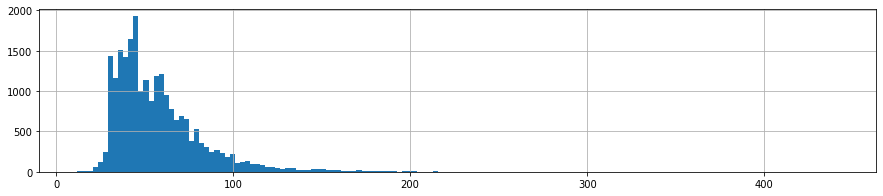

In [ ]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

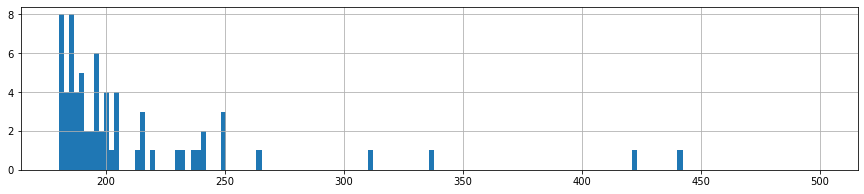

In [ ]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

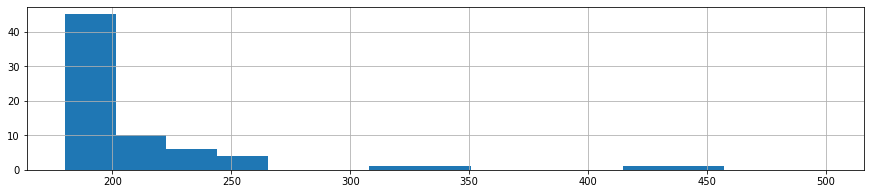

In [ ]:
# check
data.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

In [ ]:
data.query('total_area > 250').count()

total_images            6
last_price              6
total_area              6
first_day_exposition    6
rooms                   6
ceiling_height          3
floors_total            6
living_area             3
floor                   6
is_apartment            6
studio                  6
open_plan               6
kitchen_area            5
balcony                 6
locality_name           6
airports_nearest        6
cityCenters_nearest     6
parks_around3000        6
parks_nearest           2
ponds_around3000        6
ponds_nearest           2
days_exposition         4
dtype: int64

In [ ]:
data = data.loc[(data['total_area'] <= 250)|(data['total_area'].isna())]

In [ ]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,1.00,20.62,2.30,3.00,"560,000.00",10.00,3.67,1.00,1.00
0.01,1.00,27.00,2.50,4.00,"1,000,000.00",13.00,5.00,1.00,2.00
0.5,2.00,51.40,2.65,93.00,"4,600,000.00",30.00,9.00,4.00,9.00
0.99,5.00,151.56,3.66,863.00,"22,000,000.00",92.33,30.00,23.00,26.00
0.9988,6.00,196.00,4.20,976.38,"28,555,679.74",120.89,43.00,26.00,28.71


In [ ]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях
# в выбранных параметрах о продаже квартир

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,745.00","22,745.00","13,926.00","19,687.00","22,745.00","20,925.00","20,730.00","22,745.00","22,745.00"
min,1.00,12.00,2.00,1.00,"12,190.00",2.00,1.30,1.00,1.00
max,7.00,250.00,5.30,999.00,"29,999,000.00",128.00,49.40,33.00,36.00


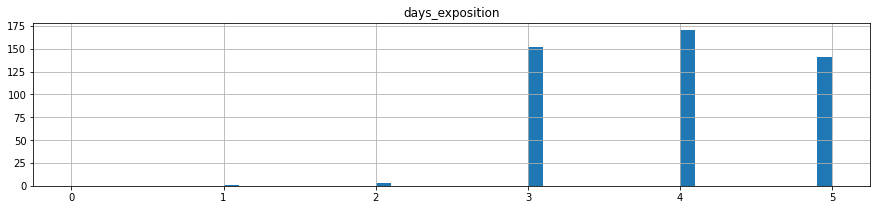

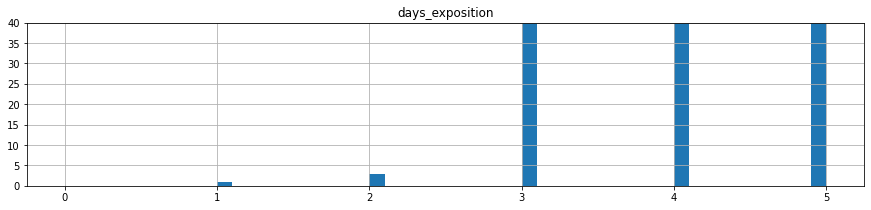

In [ ]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

In [ ]:
data.query('days_exposition < 3').count()

total_images            4
last_price              4
total_area              4
first_day_exposition    4
rooms                   4
ceiling_height          3
floors_total            4
living_area             3
floor                   4
is_apartment            4
studio                  4
open_plan               4
kitchen_area            3
balcony                 4
locality_name           4
airports_nearest        4
cityCenters_nearest     4
parks_around3000        4
parks_nearest           2
ponds_around3000        4
ponds_nearest           1
days_exposition         4
dtype: int64

In [ ]:
data = data.loc[(data['days_exposition'] > 3)|(data['days_exposition'].isna())]

### Посчитайте и добавьте в таблицу новые столбцы

Посчитаем среднюю цену за квадратный метр и внесем данные в отдельный столбец.

In [ ]:
data['price_m'] = data['last_price']/data['total_area']  # добавим столбец с ценой за метр квадратныЙ
data['price_m'] = data['price_m'].astype('int') # поменяем тип данных на целочисленный
data.head() #проверим

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000
5,10,2890000,30.4,2018-09-10,1,NaN,12,14.4,5,False,False,False,9.1,0,городской поселок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,95065


Добавим новые столбцы со значениями дня недели, мексяца и года размещения объявления на сайте

In [ ]:
data['weekday'] = data['first_day_exposition'].dt.weekday
#определяем день недели размещеничя объявления, помещаем в отдельный столбец
data['month'] = data['first_day_exposition'].dt.month # месяц
data['year'] = data['first_day_exposition'].dt.year # год
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,weekday,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018
5,10,2890000,30.4,2018-09-10,1,NaN,12,14.4,5,False,False,False,9.1,0,городской поселок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,95065,0,9,2018


Сделаем категоризацию этажей: "первый", "порследний", "другой"

In [ ]:
# создаем функцию для категоризации типов этажей
def type_floor(data):
    if data['floor'] == 1:
        return 'первый'
    elif data['floor'] < data['floors_total']:
        return 'другой'
    elif data['floor'] == data['floors_total']:
        return 'последний'
    elif data['floor'] <= 0 :
        return 'ошибка'
    else:
        return 'не найдено'

In [ ]:
data['type_floor'] = data.apply(type_floor,axis=1) # вызываем функцию и складываем значения в новый столбец


Переведем значения расстояния до центра города в километры и округлим до целого

In [ ]:
data['cityCenters_nearest'] = round(data['cityCenters_nearest'] /1000)
data.tail(10) #проверим

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,weekday,month,year,type_floor
23689,13,3550000,35.30,2018-02-28,1,2.86,15,16.3,4,False,False,False,9.10,2,Санкт-Петербург,17284.0,16.0,1.0,353.0,2.0,652.0,29.0,100566,2,2,2018,другой
23690,3,5500000,52.00,2018-07-19,2,NaN,5,31.0,2,False,False,False,6.00,0,Санкт-Петербург,20151.0,6.0,1.0,300.0,0.0,NaN,15.0,105769,3,7,2018,другой
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.3,7,False,False,False,10.60,1,Санкт-Петербург,19424.0,4.0,0.0,NaN,1.0,806.0,519.0,129903,3,10,2016,другой
23692,2,1350000,30.00,2017-07-07,1,NaN,5,17.5,4,False,False,False,6.00,0,Тихвин,NaN,NaN,0.0,NaN,0.0,NaN,413.0,45000,4,7,2017,другой
23693,9,4600000,62.40,2016-08-05,3,2.60,9,40.0,8,False,False,False,8.00,0,Петергоф,45602.0,34.0,1.0,352.0,1.0,675.0,239.0,73717,4,8,2016,другой
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,False,False,False,13.83,0,Санкт-Петербург,24665.0,4.0,1.0,796.0,3.0,381.0,NaN,72490,1,3,2017,другой
23695,14,3100000,59.00,2018-01-15,3,NaN,5,38.0,4,False,False,False,8.50,0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0,52542,0,1,2018,другой
23696,18,2500000,56.70,2018-02-11,2,NaN,3,29.7,1,False,False,False,NaN,0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN,44091,6,2,2018,первый
23697,13,11475000,76.75,2017-03-28,2,3.00,17,NaN,12,False,False,False,23.30,2,Санкт-Петербург,39140.0,10.0,2.0,173.0,3.0,196.0,602.0,149511,1,3,2017,другой
23698,4,1350000,32.30,2017-07-21,1,2.50,5,12.3,1,False,False,False,9.00,0,поселок Новый Учхоз,NaN,NaN,0.0,NaN,0.0,NaN,NaN,41795,4,7,2017,первый


## Проведем исследовательский анализ данных

#### Общая площадь

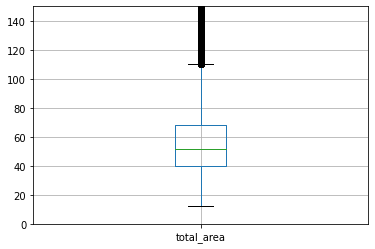

In [ ]:
plt.ylim(0, 150) #выставляем значения по оси у
data.boxplot('total_area') # строим диаграмму размаха
plt.show()

In [ ]:
data['total_area'].describe()

count    22741.000000
mean        57.552796
std         25.252299
min         12.000000
25%         40.000000
50%         51.400000
75%         68.000000
max        250.000000
Name: total_area, dtype: float64

Стандартное отклонение в 2 раза ниже среднего. Это говорит о том, что значения набора данных имеют большой разброс. Это действительно так, учитывая, что у нас есть квартира 12 квадратов и 250 квадратов.
По диаграмме размаха можем определить, что большинство квартир имеют площадь от 40 до 70 кв. м.  - это значения, которые входят в "ящик". Минимальное значение 12 кв.м., верхний ус примерно на 110 кв.м. Остальные значения считаем выбросами. Медиана проходит примерно на 50

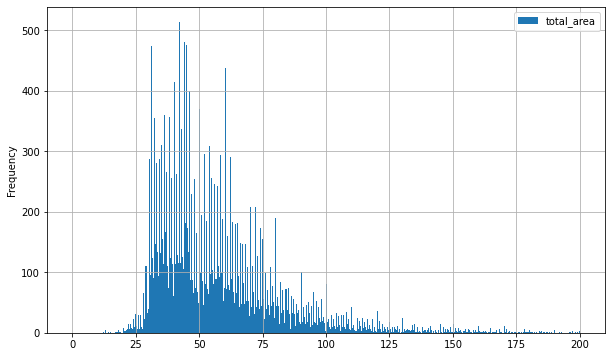

In [ ]:
data.plot(y = 'total_area', kind = 'hist', bins = 500, grid=True, range = (0,200), figsize = (10,6)) #построим гистограмму
plt.show()

Ориентируясь на гистограмму и диаграмму размаха возьмем значения выше 120 за выбросы

Построим гистограмму минимальных значений

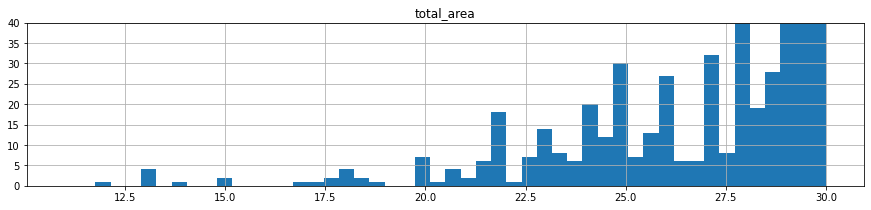

In [ ]:
data.hist(column = 'total_area', bins = 50, figsize = (15,3), range = (11,30))
plt.ylim(0, 40);

In [ ]:
data.query('total_area < 20').count()

total_images            19
last_price              19
total_area              19
first_day_exposition    19
rooms                   19
ceiling_height          10
floors_total            19
living_area             11
floor                   19
is_apartment            19
studio                  19
open_plan               19
kitchen_area             4
balcony                 19
locality_name           19
airports_nearest        14
cityCenters_nearest     14
parks_around3000        19
parks_nearest            6
ponds_around3000        19
ponds_nearest            9
days_exposition         19
price_m                 19
weekday                 19
month                   19
year                    19
type_floor              19
dtype: int64

Т.к строк со значениями ниже 20 всего 19, можем взять 20 за минимальное значение

In [ ]:
data = data.loc[(data['total_area'] >=20)&(data['total_area'] <=120)|(data['total_area'].isna())]

#### Жилая площадь

Проверим сразу нет ли значений жилой площади кухни превышающих значенияе общей площади квартиры

In [ ]:
data.query( 'living_area > total_area or kitchen_area > total_area').count()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
price_m                 0
weekday                 0
month                   0
year                    0
type_floor              0
dtype: int64

Таких значений нет

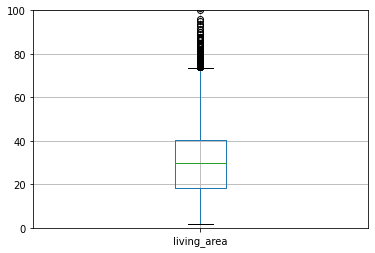

In [ ]:
plt.ylim(0, 100) #выставляем значения по оси у
data.boxplot('living_area') # строим диаграмму размаха
plt.show()

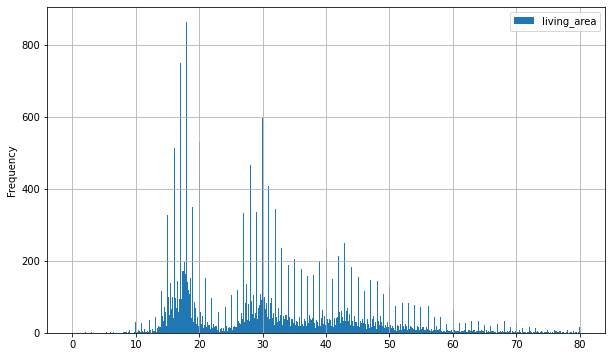

In [ ]:
data.plot(y = 'living_area', kind = 'hist', bins = 500, grid=True, range = (0, 80), figsize = (10,6))
#построим гистограмму
plt.show()

In [ ]:
data['living_area'].describe()

count    20333.000000
mean        31.380894
std         13.799247
min          2.000000
25%         18.400000
50%         30.000000
75%         40.500000
max        101.000000
Name: living_area, dtype: float64

Правильно, что мы не стали менять пропуски на среднее значение. Среднее значение выше, чем общая площадь самой маленькой квартиры. Верний ус примерно 78. Нижний - минимум - 2 кв.м., это очень мало, но и такое может быть, если это студия. Большая часть квартир имеет жилую площадь от 19 до 42 кв.м. - вполне сравнимо с общей площадью (от 40 до 70 кв. м.)

In [ ]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22069 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22069 non-null  int64         
 1   last_price            22069 non-null  int64         
 2   total_area            22069 non-null  float64       
 3   first_day_exposition  22069 non-null  datetime64[ns]
 4   rooms                 22069 non-null  int64         
 5   ceiling_height        13461 non-null  float64       
 6   floors_total          22069 non-null  int64         
 7   living_area           20333 non-null  float64       
 8   floor                 22069 non-null  int64         
 9   is_apartment          22069 non-null  bool          
 10  studio                22069 non-null  bool          
 11  open_plan             22069 non-null  bool          
 12  kitchen_area          20128 non-null  float64       
 13  balcony         

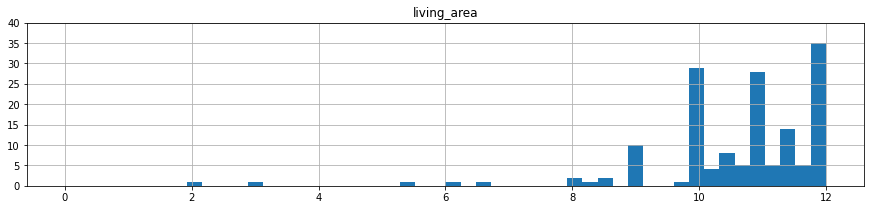

In [ ]:
data.hist(column = 'living_area', bins = 50, figsize = (15,3), range = (0,12))
plt.ylim(0, 40);

In [ ]:
data.query('living_area < 10').count()

total_images            21
last_price              21
total_area              21
first_day_exposition    21
rooms                   21
ceiling_height          15
floors_total            21
living_area             21
floor                   21
is_apartment            21
studio                  21
open_plan               21
kitchen_area            21
balcony                 21
locality_name           21
airports_nearest        21
cityCenters_nearest     21
parks_around3000        21
parks_nearest           10
ponds_around3000        21
ponds_nearest            9
days_exposition         18
price_m                 21
weekday                 21
month                   21
year                    21
type_floor              21
dtype: int64

Возьмем значение за минимум и избавимся от 21 строки с меньшими значениями

In [ ]:
data = data.loc[(data['living_area'] >=10)&(data['living_area'] <=78)|(data['living_area'].isna())]
#оставляем лишь значения в пределах нормальных значений


In [ ]:
# check
data.shape[0]

21973

#### Площадь кухни

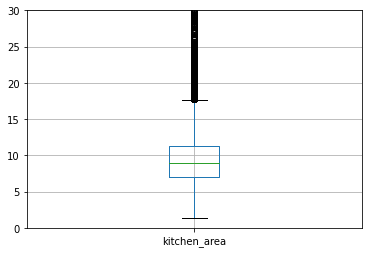

In [ ]:
plt.ylim(0, 30) #выставляем значения по оси у
data.boxplot('kitchen_area') # строим диаграмму размаха
plt.show()

In [ ]:
data['kitchen_area'].describe()

count    20040.000000
mean         9.911968
std          4.339390
min          1.300000
25%          7.000000
50%          9.000000
75%         11.300000
max         49.400000
Name: kitchen_area, dtype: float64

История похожа на предыдущие. Разброс данных от 1кв.м до 30. Стандартное отклонение высокое. Выбросы за пределами 17кв.м. В основном кухни 6- 12 кв.м

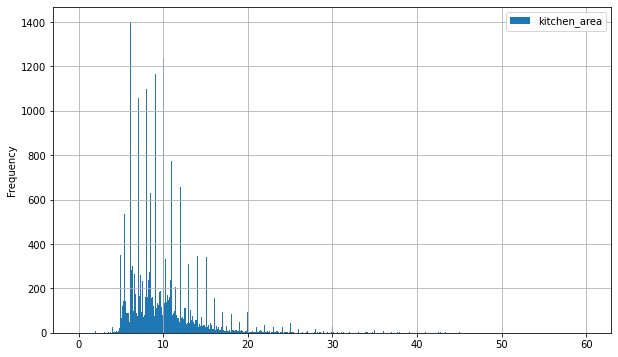

In [ ]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 500, grid=True, range = (0,60), figsize = (10,6))
#построим гистограмму
plt.show()

In [ ]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21973 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21973 non-null  int64         
 1   last_price            21973 non-null  int64         
 2   total_area            21973 non-null  float64       
 3   first_day_exposition  21973 non-null  datetime64[ns]
 4   rooms                 21973 non-null  int64         
 5   ceiling_height        13394 non-null  float64       
 6   floors_total          21973 non-null  int64         
 7   living_area           20237 non-null  float64       
 8   floor                 21973 non-null  int64         
 9   is_apartment          21973 non-null  bool          
 10  studio                21973 non-null  bool          
 11  open_plan             21973 non-null  bool          
 12  kitchen_area          20040 non-null  float64       
 13  balcony         

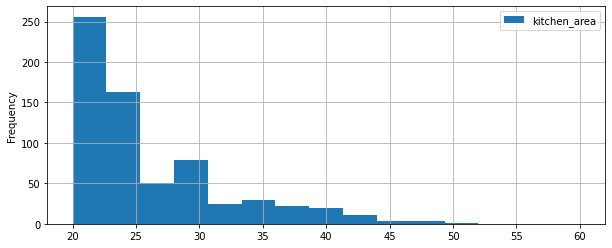

In [ ]:
# check
data.plot(y = 'kitchen_area', kind = 'hist', bins = 15, grid=True, range = (20,60), figsize = (10,4));

Все, что больше 40 возьмем за выбросы

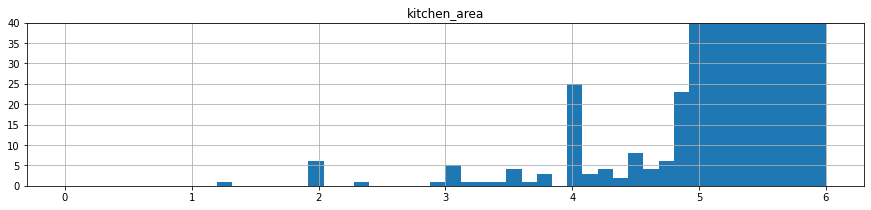

In [ ]:
data.hist(column = 'kitchen_area', bins = 50, figsize = (15,3), range = (0,6))
plt.ylim(0, 40);

In [ ]:
data.query('kitchen_area < 4').count()

total_images            25
last_price              25
total_area              25
first_day_exposition    25
rooms                   25
ceiling_height          17
floors_total            25
living_area             25
floor                   25
is_apartment            25
studio                  25
open_plan               25
kitchen_area            25
balcony                 25
locality_name           25
airports_nearest        20
cityCenters_nearest     20
parks_around3000        25
parks_nearest            5
ponds_around3000        25
ponds_nearest           12
days_exposition         23
price_m                 25
weekday                 25
month                   25
year                    25
type_floor              25
dtype: int64

Все, что меньше 4 возьмем за выбросы

In [ ]:
data = data.loc[(data['kitchen_area'] >=4)&(data['kitchen_area'] <=40)|(data['kitchen_area'].isnull())]

In [ ]:
# check
data.shape[0]

21924

#### Цена

In [ ]:
data['last_price'].describe()

count    2.192400e+04
mean     5.288666e+06
std      3.143623e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.500000e+06
75%      6.300000e+06
max      2.990000e+07
Name: last_price, dtype: float64

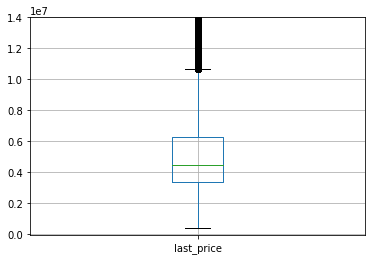

In [ ]:
plt.ylim(-3e+04, 1.4e+07)
data.boxplot('last_price')
plt.show()

Разброс цен огромен. Не удивительно, ведь расположены они в разных местах. Большая часть квартир стоит 3,5 - 7 млн. руб.  

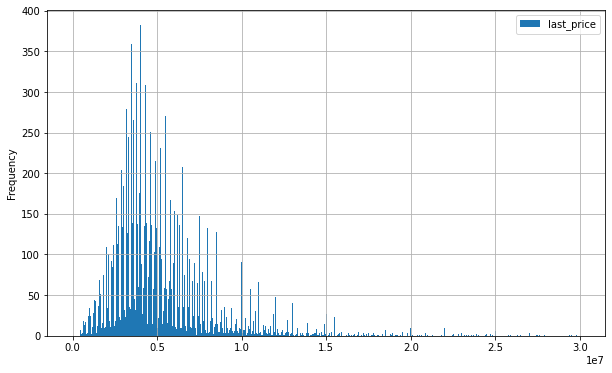

In [ ]:
data.plot(y = 'last_price', kind = 'hist', bins = 1000, grid=True, range = (0,3.0e+07), figsize = (10,6))
#построим гистограмму
plt.show()

По гистограмме видно, что самая частая цена около 4 млн.руб

In [ ]:
data = data.loc[(data['last_price'] <=2.0e+07)] #избавляемся от выбросов


In [ ]:
# check
data.shape[0]

21816

#### Количество комнат

In [ ]:
data['rooms'].describe()

count    21816.000000
mean         1.966355
std          0.887515
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

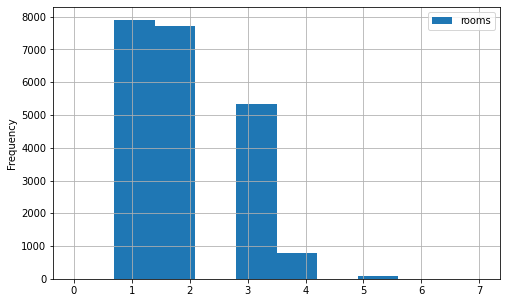

In [ ]:
data.plot(y = 'rooms', kind = 'hist', bins = 10, grid=True, range = (0,7), figsize = (8,5)) #построим гистограмму
plt.show()

По гистограмме видим, что чаще всего продают однокомнатные и двухкомнатные квартиры.

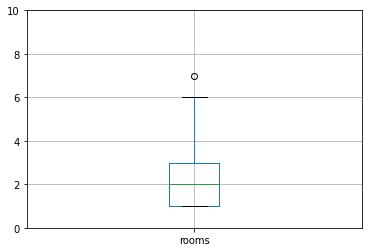

In [ ]:
plt.ylim(0,10)
data.boxplot('rooms')
plt.show()

Семикомнатные попали в выбросы. Но мы их оставим, как интересные для исследования

#### Высота потолков

In [ ]:
data['ceiling_height'].describe()

count    13289.000000
mean         2.695765
std          0.240063
min          2.000000
25%          2.500000
50%          2.600000
75%          2.760000
max          5.300000
Name: ceiling_height, dtype: float64

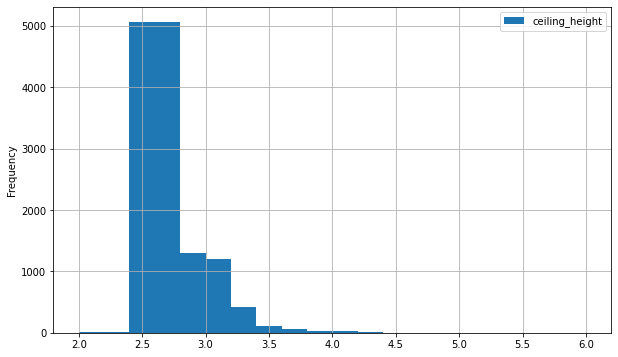

In [ ]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 20, grid=True, range = (2,6), figsize = (10,6))
#построим гистограмму
plt.show()

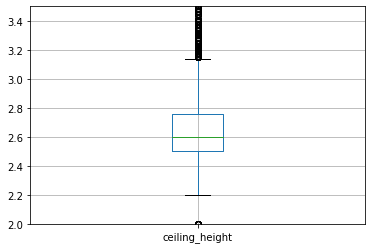

In [ ]:
plt.ylim(2, 3.5)
data.boxplot('ceiling_height')
plt.show()

Средняя высота потолка 2,6 м. Минимальная высота сейчас 2,2 м., а максимум 5,3 м.. Т.к такие значения имеют место быть в реальности, не будем удалять их из таблицы, как выбросы.

#### Этаж

In [ ]:
data['floor'].describe()

count    21816.000000
mean         5.899936
std          4.885771
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

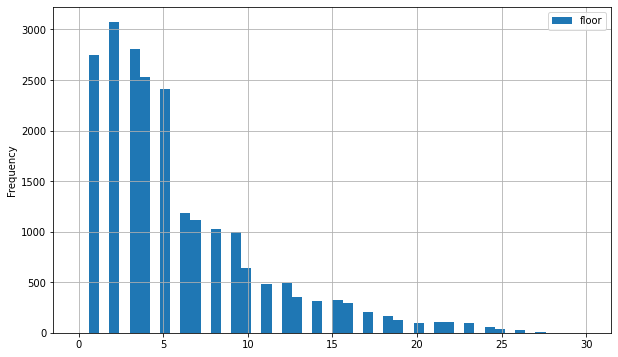

In [ ]:
data.plot(y = 'floor', kind = 'hist', bins = 50, grid=True, range = (0,30), figsize = (10,6)) #построим гистограмму
plt.show()

Самые часто встречающиеся значения 1-5. Очень похоже на правду. Стандартное отклонение небольшое, что говорит о небольшом разбросе значений.

Проверим на аномалии значения количества этажей в здании. Нет ли таких строк, где этаж больше количества этажей в здании.

In [ ]:
data.query( 'floor > floors_total').count()


total_images            71
last_price              71
total_area              71
first_day_exposition    71
rooms                   71
ceiling_height           7
floors_total            71
living_area             47
floor                   71
is_apartment            71
studio                  71
open_plan               71
kitchen_area            35
balcony                 71
locality_name           71
airports_nearest        65
cityCenters_nearest     65
parks_around3000        71
parks_nearest           31
ponds_around3000        71
ponds_nearest           43
days_exposition         63
price_m                 71
weekday                 71
month                   71
year                    71
type_floor              71
dtype: int64

In [ ]:
data.loc[data['floor'] > data['floors_total'], 'floors_total'] = data['floor']


Такие строки есть. Поменяем значения общего количества этажей на этаж, приняв его за последний. 72 строки - это меньше 1%.

#### Тип этажа

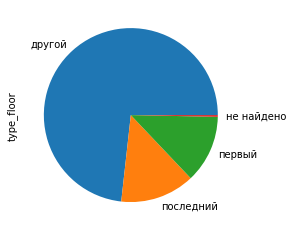

In [ ]:
data['type_floor'].value_counts().plot(kind='pie')
plt.show()

Квартир на первом и последнем этажах практически поровну.

#### Общее количество этажей в доме

In [ ]:
data['floors_total'].describe()

count    21816.000000
mean        10.749908
std          6.597222
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

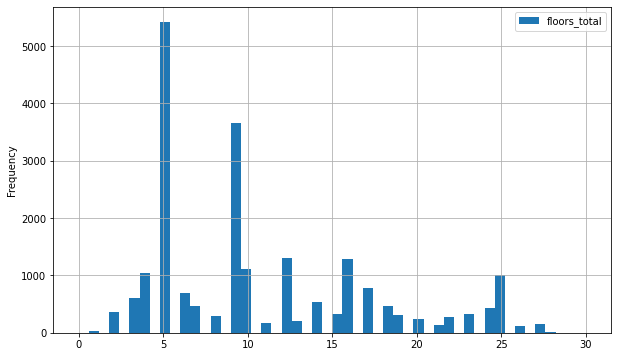

In [ ]:
data.plot(y = 'floors_total', kind = 'hist', bins = 50, grid=True, range = (0,30), figsize = (10,6))
#построим гистограмму
plt.show()

Чаще всего дома имеют 5 и 9 этажей. Так и есть.

#### Расстояние до центра города

In [ ]:
data['cityCenters_nearest'].describe()

count    16485.000000
mean        14.722414
std          8.511493
min          0.000000
25%         10.000000
50%         13.000000
75%         17.000000
max         66.000000
Name: cityCenters_nearest, dtype: float64

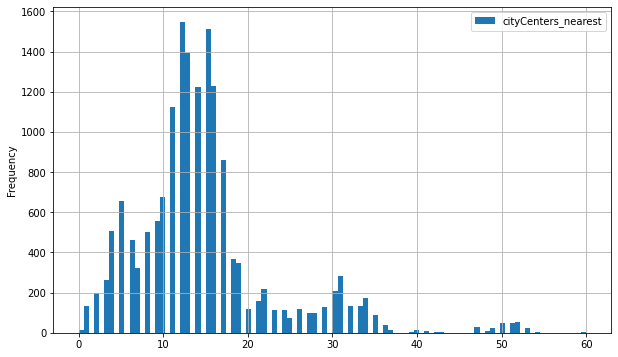

In [ ]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 100, grid=True, range = (0,60), figsize = (10,6))
#построим гистограмму
plt.show()

Меньше всего квартир находится в центре города. А некоторые расположены аж в 60 км.

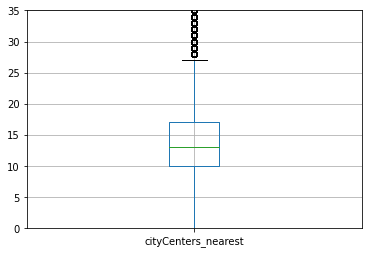

In [ ]:
plt.ylim(0, 35)
data.boxplot('cityCenters_nearest')
plt.show()

Большая часть квартир расположена на расстоянии 11-18 км от центра города. Нижний ус на отметке 2. Значит кто-то живет в центре. Верхний ус на 26 км. Остальное считаем выбросами

#### Расстояние до аэропорта

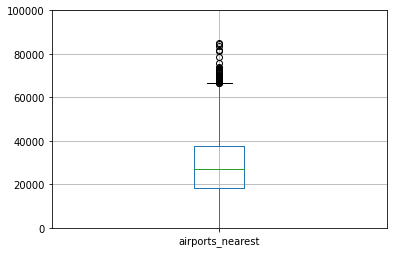

In [ ]:
plt.ylim(0, 100000)
data.boxplot('airports_nearest')
plt.show()

В основном расстояние до аэропорта в значениях от 18 до 39 км. Но мы помним, что во многих строках значения просто отсутствовали

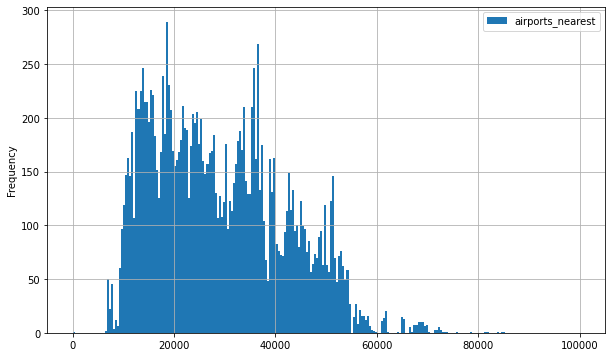

In [ ]:
data.plot(y = 'airports_nearest', kind = 'hist', bins = 250, grid=True, range = (0,100000), figsize = (10,6))
#построим гистограмму
plt.show()

#### Расстояние до ближайшего парка

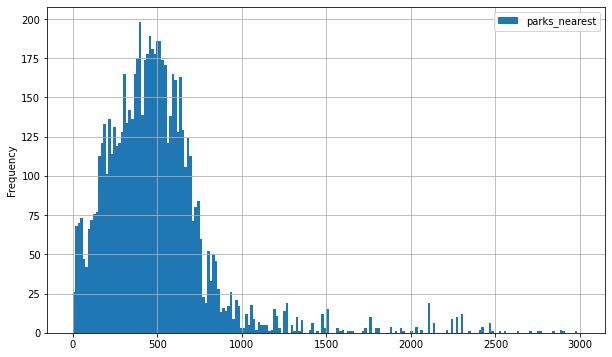

In [ ]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 200, grid=True, range = (0,3000), figsize = (10,6))
#построим гистограмму
plt.show()

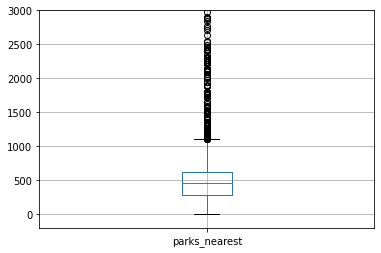

In [ ]:
plt.ylim(-200, 3000)
data.boxplot('parks_nearest')
plt.show()

In [ ]:
data['parks_nearest'].describe()

count    7066.000000
mean      493.430795
std       339.088390
min         1.000000
25%       289.000000
50%       458.000000
75%       616.000000
max      3190.000000
Name: parks_nearest, dtype: float64

В основном в продаже квартиры недалеко от парка, в 300-600 метрах. Но кому-то очень повезет и до парка будет 1 м.

#### День и месяц публикации

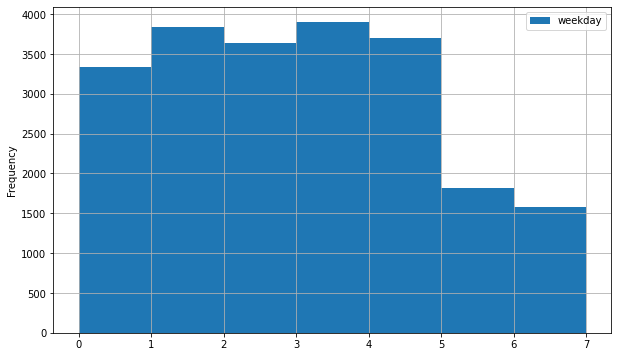

In [ ]:
data.plot(y = 'weekday', kind = 'hist', bins = 7, grid=True, range = (0,7), figsize = (10,6)) #построим гистограмму
plt.show()

Чаще всего размещают объявления по четвергам, а реже всего по воскресеньям

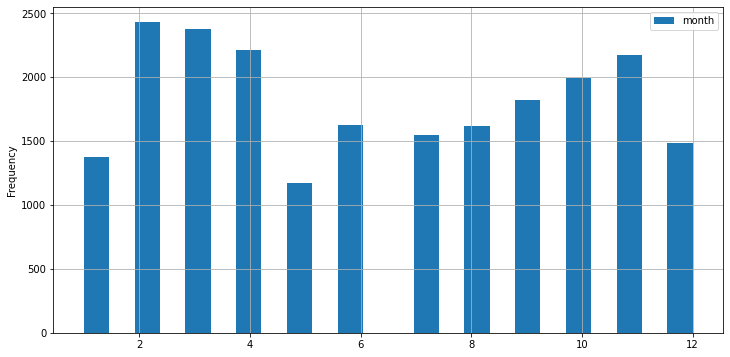

In [ ]:
data.plot(y = 'month', kind = 'hist', bins = 24, grid=True, range = (1,12), figsize = (12,6)) #построим гистограмму
plt.show()

Самый насыщенный на объявления месяц февраль. В мае размещают объявления реже всего

In [ ]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях
# в выбранных параметрах о продаже квартир

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,816.00","21,816.00","13,289.00","19,009.00","21,816.00","20,097.00","19,897.00","21,816.00","21,816.00"
min,1.00,20.00,2.00,3.00,"430,000.00",10.00,4.00,1.00,1.00
max,7.00,120.00,5.30,999.00,"20,000,000.00",78.00,40.00,33.00,36.00


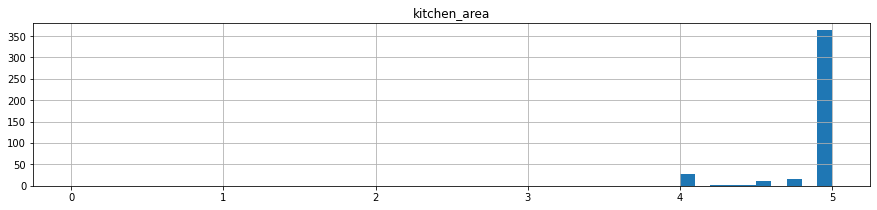

In [ ]:
# check
data.hist(column = 'kitchen_area', bins = 50, figsize = (15,3), range = (0,5));

#### Как быстро продавались квартиры

In [ ]:
data_corr_days = data.query('~days_exposition.isna() and days_exposition >= 1')
# делаем выборку без нулевых значений и пустых строк

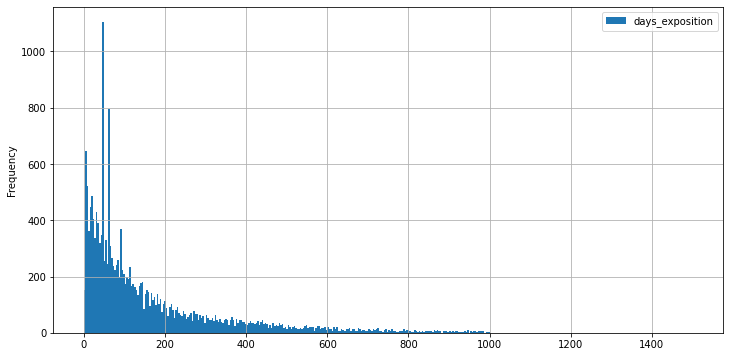

In [ ]:
data_corr_days.plot(y = 'days_exposition', kind = 'hist', bins = 400, grid=True, range = (0,1500), figsize = (12,6))
#построим гистограмму
plt.show()

In [ ]:
data_corr_days['days_exposition'].describe()

count    19009.000000
mean       163.562944
std        184.226479
min          3.000000
25%         44.000000
50%         91.000000
75%        216.000000
max        999.000000
Name: days_exposition, dtype: float64

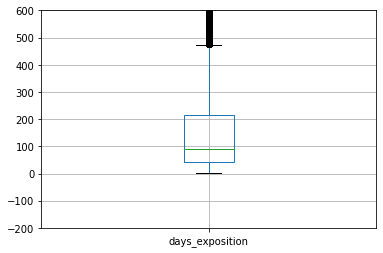

In [ ]:
plt.ylim(-200, 600)
data_corr_days.boxplot('days_exposition')
plt.show()

Большая часть объявлений висела на сайте от 50 до 200 дней. Все, что больше 500 возьмем за выбросы. Построим гистограмму без них

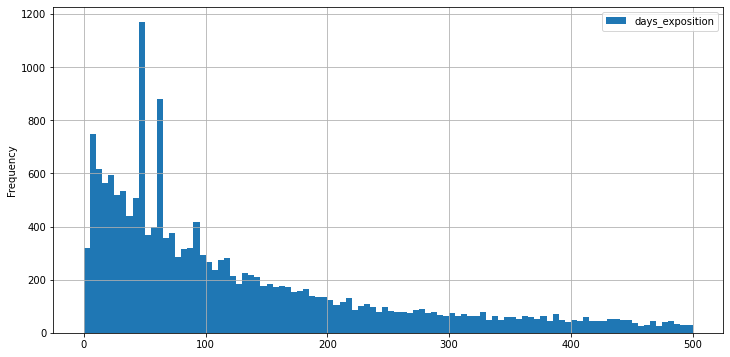

In [ ]:

#построим гистограмму
data_corr_days.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, range = (0,500), figsize = (12,6))
plt.show()

Чаще всего объявления висят около трех месяцев, но бывает, что квартиры продаются за 1 день или, наоборот, очень долго не продаются, как та, что висела дольше 4 лет.

Изучив сайт Яндекс.Недвижимость, видим, что срок публикации объявления для квартир от 10 млн — 90 дней. Поэтому на графике мы видим скачок. Это не значит, что квартиры проданы. Скорее всего у них просто закнчился срок объявления.  Тоже самое происходит и с квартирами до 4,5 млн. — 45 дней, от 4,5 до 10 млн — 60 дней

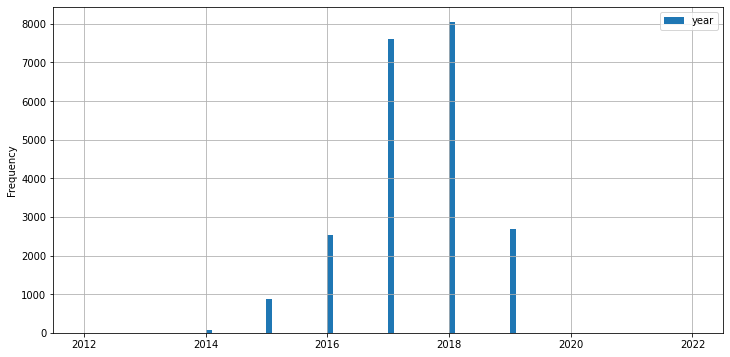

In [ ]:
data.plot(y = 'year', kind = 'hist', bins = 100, grid=True, range = (2012,2022), figsize = (12,6))
plt.show()

Либо продажи росли по годам, либо данные вводили регулярнее. Скорее всего данные в таблице не до конца 2019 г.

## Изучим какие факторы больше всего влияют на общую стоимость объекта

### Зависимость цены от общей площади

In [ ]:
data['last_price'].corr(data['total_area'])

0.730607090018265

Корреляция положительная. Коэффициент Пирсона в 0.73 говорит о наличии связи, и довольно сильной. Выходит, увеличение площади сопровождается увеличением цены, но так бывает не всегда.

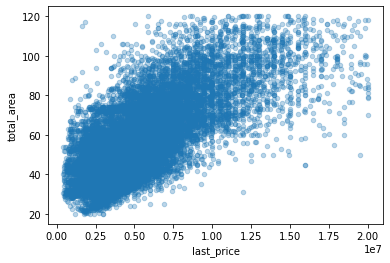

In [ ]:
data.plot(x = 'last_price', y = 'total_area', kind = 'scatter',  alpha = 0.3)
plt.show()

Есть основная масса точек с наиболее частыми сочетаниями цены и площади. При этом с увеличением площади увеличивается и цена. Это мы можем увидеть на графике. Но лишь в среднем. Можно найти уникальные примеры квартир с высокой ценой и не очень большой площадью.

### Завсисимость цены от жилой площади

In [ ]:
data['last_price'].corr(data['living_area'])

0.5935695614314986

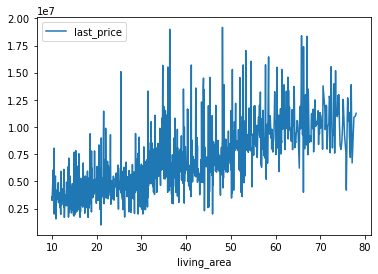

In [ ]:
data.pivot_table(index = 'living_area', values  = 'last_price').plot()
plt.show()

Очень похоже на общую площадь. Коэффициент Пирсона еще ниже, 0,59. Значит зависимость цены от жилой площади ниже, чем от общей

### Завсисимость цены от площади кухни

In [ ]:
data['last_price'].corr(data['kitchen_area'])

0.5464135120612365

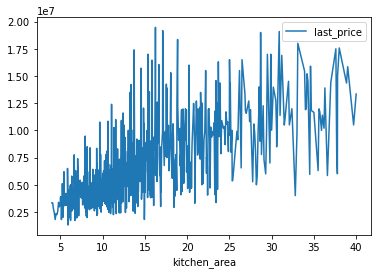

In [ ]:
data.pivot_table(index = 'kitchen_area', values  = 'last_price').plot()
plt.show()

А зависимость цены от площади кухни еще ниже.
*Хочется посмотреть как зависит жилая площадь и площадь кухни от общей площади*

In [ ]:
#создадим перемеенную для столбцов общая площадь, жилая площадь и площадь кухни
data_corr_area = data.filter(['total_area','kitchen_area','living_area'], axis=1)
#корреляция по трем столбцам
data_corr_area.corr()

,total_area,kitchen_area,living_area
total_area,1.000000,0.482685,0.909565
kitchen_area,0.482685,1.000000,0.191732
living_area,0.909565,0.191732,1.000000


Видим сильную связь между общей и жилой площадью. А вот связь между общей площадью и кухней низкая. Это значит, что и в больших квартирах часто встречаются маленькие кухни.

### Завсисимость цены от количества комнат

In [ ]:
data['last_price'].corr(data['rooms'])

0.43332704396276617

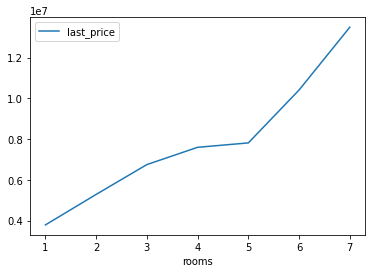

In [ ]:
data.pivot_table(index = 'rooms', values  = 'last_price').plot()
plt.show()

Коэффициент корреляции низкий, значит зависимость цены от количества комнат слабая

### Завсисимость цены от этажа, на котором расположена квартира

In [ ]:
data['last_price'].corr(data['floor'])

0.1218105319163859

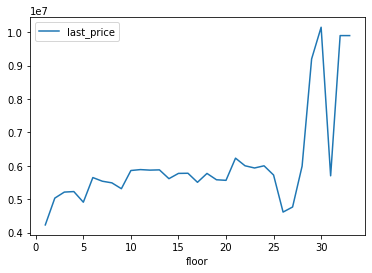

In [ ]:

data.pivot_table(index = 'floor', values  = 'last_price').plot()
plt.show()


Корреляция цены и этажа очень слабая, всего 0,12.

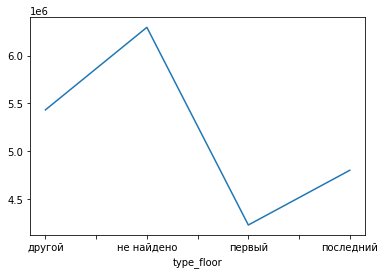

In [ ]:
data_floor = data.groupby('type_floor')['last_price'].mean()
data_floor.plot()
plt.show()


In [ ]:
data_floor


type_floor
другой        5.432199e+06
не найдено    6.294832e+06
первый        4.228888e+06
последний     4.800969e+06
Name: last_price, dtype: float64

Самые дешевые квартиры на первом этаже, далее на последнем, остальные дороже.

### Завсисимость цены от даты размещения

In [ ]:
#создадим перемеенную для столбцов даты и цены.
#Т.к столбец Дата публикации имеет тип данных datetime и корреляцию по нему сделать невозможно
data_corr_date = data.filter(['last_price','weekday','month','year'], axis=1)
#корреляция по четырем столбцам
data_corr_date.corr()


,last_price,weekday,month,year
last_price,1.000000,-0.012034,0.006185,0.000945
weekday,-0.012034,1.000000,0.009439,-0.006376
month,0.006185,0.009439,1.000000,-0.276299
year,0.000945,-0.006376,-0.276299,1.000000


Корреляция цены и даты начинается с сотых значений, значит она очень слабая

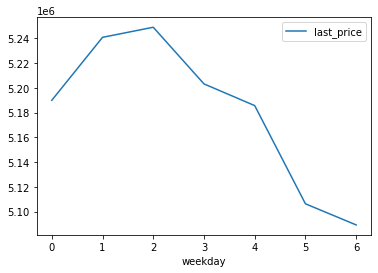

In [ ]:
data.pivot_table(index = 'weekday', values  = 'last_price').plot()
plt.show()

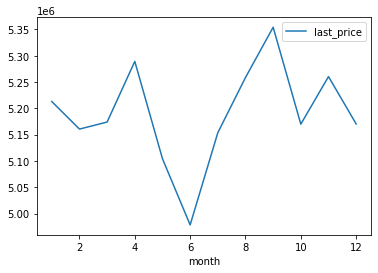

In [ ]:
data.pivot_table(index = 'month', values  = 'last_price').plot()
plt.show()

### Посчитаем среднюю цену за квадратный метр в 10 населенных пунктах с наибольшим числом объявлений

In [ ]:
top10_price_m = data.pivot_table(index = 'locality_name', values = 'price_m', aggfunc=['count', 'mean'])
top10_price_m.columns = ['count', 'mean']
top10_price_m = top10_price_m.sort_values('count', ascending = False)
top10_price_m.head(10)

,count,mean
locality_name,,
Санкт-Петербург,14146,108603.074085
Мурино,553,85498.848101
Кудрово,445,95142.062921
поселок Шушары,429,78224.370629
Всеволожск,384,67194.148438
Пушкин,341,101938.712610
Колпино,334,75316.068862
поселок Парголово,321,90374.937695
Гатчина,304,68919.016447


Выведем минимальное и максимальное значение стоимости квадратного метра.

In [ ]:
top10_price_m.sort_values(by = 'mean').head(1)

,count,mean
locality_name,,
деревня Старополье,3,11206.0


In [ ]:
top10_price_m.sort_values(by = 'mean', ascending = False).head(1)

,count,mean
locality_name,,
поселок Лисий Нос,2,113728.0


Самый дешевый квадратный метр в деревне Старополье 10368 руб. Самый дорогой в Санкт-Петербурге 103796 руб.

In [ ]:
top10_price_m = top10_price_m.head(10)

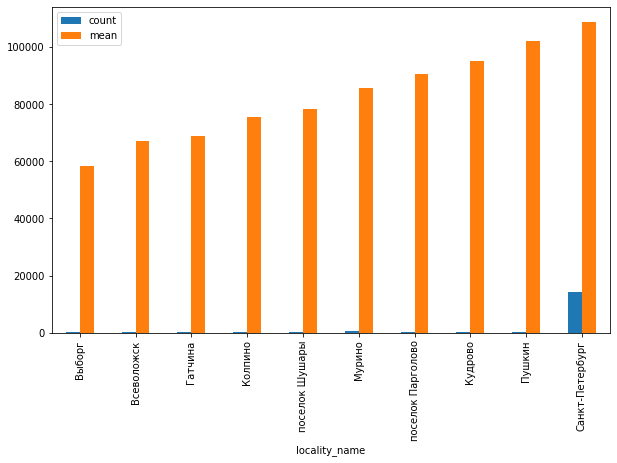

In [ ]:
top10_price_m.sort_values(by = 'mean').plot(kind= 'bar', figsize = (10,6))
plt.show()


### Изучим зависимость стоимости объектов от расстояния до центра города

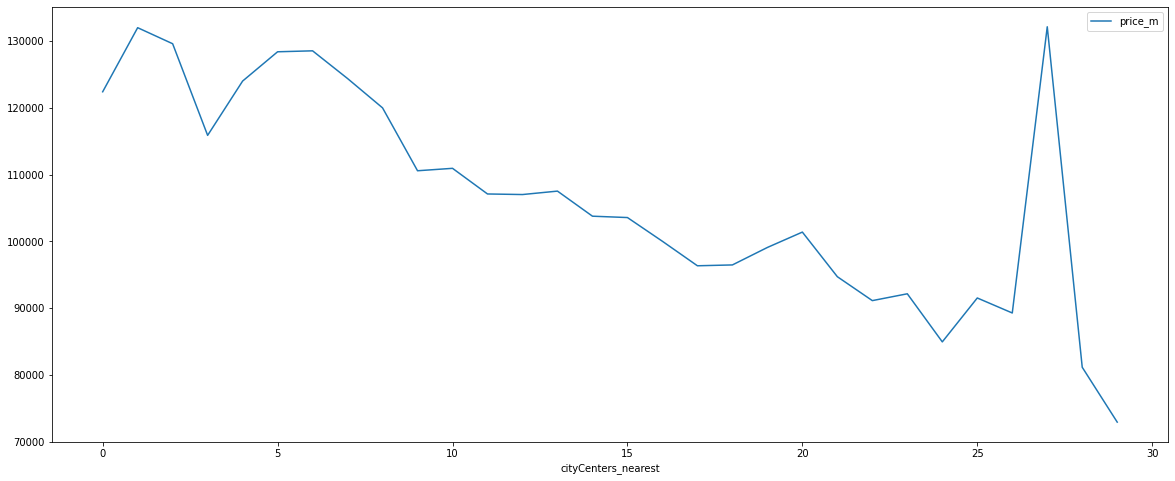

In [ ]:
data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'cityCenters_nearest', values = 'price_m', aggfunc = 'mean').plot(figsize=(20,8))
plt.show()

По графику видно, как средняя цена за квадратный метр уменьшается с отдалением от центра. Выведем сводную таблицу со средними значениями цен за каждый километр.


Изучим причину выбросов на 27 км.

In [ ]:
data.query('cityCenters_nearest < 28 and cityCenters_nearest > 26')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,weekday,month,year,type_floor
140,8,16912000,105.70,2016-12-09,2,2.70,3,48.40,1,False,False,False,15.40,0,Пушкин,14352.0,27.0,3.0,366.0,3.0,179.0,390.0,160000,4,12,2016,первый
439,9,8570000,72.00,2018-08-11,3,3.00,6,42.00,4,False,False,False,10.00,0,Пушкин,14691.0,27.0,0.0,NaN,0.0,NaN,149.0,119027,5,8,2018,другой
556,0,3500000,28.50,2018-06-06,1,2.50,5,16.00,4,False,False,False,5.00,1,Пушкин,14852.0,27.0,0.0,NaN,0.0,NaN,86.0,122807,2,6,2018,другой
558,13,4500000,65.50,2017-10-27,3,2.60,10,42.00,7,False,False,False,8.00,2,поселок Металлострой,25531.0,27.0,0.0,NaN,0.0,NaN,32.0,68702,4,10,2017,другой
748,13,14350000,74.00,2017-11-28,2,3.13,5,30.00,3,False,False,False,25.00,0,Санкт-Петербург,23888.0,27.0,1.0,1496.0,0.0,NaN,128.0,193918,1,11,2017,другой
931,8,6650000,69.00,2017-06-20,3,3.20,3,50.00,2,False,False,False,7.00,0,Пушкин,14950.0,27.0,1.0,27.0,0.0,NaN,261.0,96376,1,6,2017,другой
1138,1,8000000,84.40,2017-08-22,3,2.50,4,60.00,1,False,False,False,9.60,0,Пушкин,14528.0,27.0,3.0,398.0,3.0,213.0,584.0,94786,1,8,2017,первый
1675,4,3300000,31.00,2017-02-20,1,2.50,4,17.00,3,False,False,False,5.00,0,Пушкин,14528.0,27.0,3.0,398.0,3.0,213.0,651.0,106451,0,2,2017,другой
1719,12,4200000,38.00,2018-02-12,1,2.70,4,17.00,3,False,False,False,9.00,1,Пушкин,14982.0,27.0,3.0,311.0,3.0,557.0,162.0,110526,0,2,2018,другой
1904,14,5150000,50.00,2018-11-11,2,NaN,3,30.00,3,False,False,False,6.00,0,Пушкин,14619.0,27.0,1.0,560.0,0.0,NaN,25.0,103000,6,11,2018,последний


In [ ]:
data['locality_name'].value_counts()

Санкт-Петербург                                            14146
Мурино                                                       553
Кудрово                                                      445
поселок Шушары                                               429
Всеволожск                                                   384
Пушкин                                                       341
Колпино                                                      334
поселок Парголово                                            321
Гатчина                                                      304
Выборг                                                       229
Петергоф                                                     192
Красное Село                                                 174
Сестрорецк                                                   172
деревня Новое Девяткино                                      139
Сертолово                                                    134
Ломоносов                

Большая часть строк - это город Пушкин, где Црское село. Исторический объект объясняет высокую стоимость на жилье. Очевидно, что при продаже вместо Пушкина был указан Санкт-Петербург


In [ ]:
data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'cityCenters_nearest',\
                                                             values = 'price_m', aggfunc = 'mean')

,price_m
cityCenters_nearest,
0.0,122387.333333
1.0,131978.625954
2.0,129577.454545
3.0,115866.942966
4.0,123990.453831
5.0,128374.314024
6.0,128516.484783
7.0,124369.257764
8.0,119979.808765


## Общий вывод

Итак, мы выяснили, что самые дорогие объекты недвижимости находятся в Санкт-Петербурге - в среднем 103796 руб. за кв.м. Чем ближе к центру города, тем выше цена за квадратный метр жилья. Самое большое количество объектов в предложениях находятся на расстоянии 11-18 км. от центра города.

В Санкт-Петербурге распределение цены от центра к окраине возрастает.

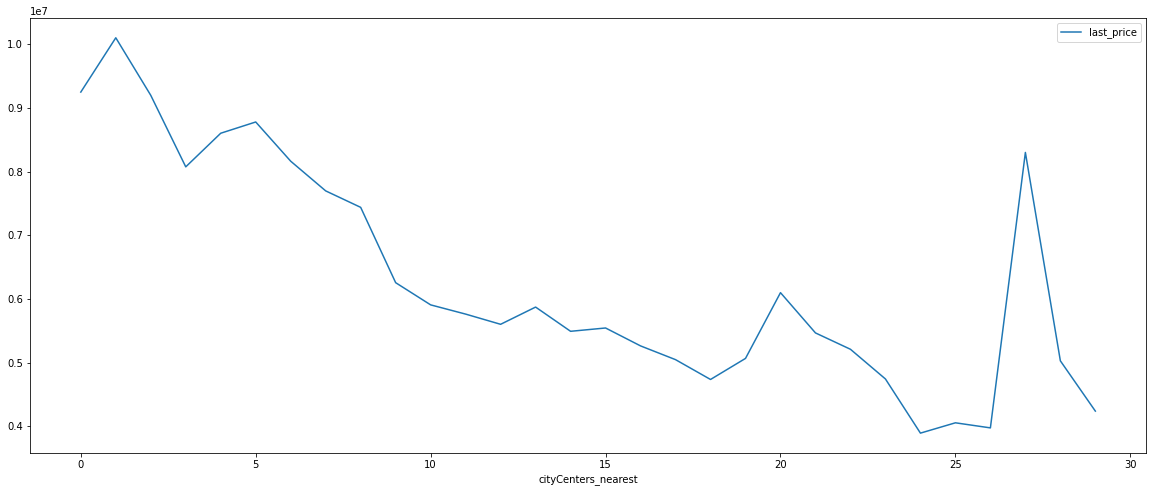

In [ ]:
data.query('locality_name == "Санкт-Петербург"')\
    .pivot_table(index = 'cityCenters_nearest', values = 'last_price', aggfunc = 'mean').plot(figsize=(20,8))
plt.show()

Также цена очень зависит от общей площади квартиры. При этом площадь кухни мало влияет на цену и, практически, не зависит от общей площади.

Этаж, количество комнат и дата размещения объявления слабо влияют на стоимость квартиры. Самая распространенная этажность домов 5ти и 9тиэтажки, скорее всего "хрущевки" и "панельки". Правдоподобно. При этом чаще всего в объявлениях встречаются квартиры на 1-5 этажах.

Большая часть объявлений размещается по четвергам. Меньше всего публикуется по воскресеньям. Чаще всего объекты продаются в течение 90 дней. Но бывают исключения. Большое количество объявлений снимается до 45 дней.